In [1]:
from rna_sequences import RNASequences
from my_pca import MyPCA
from univariate import Ttest
from multivariate import ElasticNet

## Step 1 - Data Preprocessing

In [2]:
sequences = RNASequences()
samples = sequences.get_samples()
samples.sample(n=5)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,Subject ID,Sample Group,CNS Subregion
GSM3533329,52,94,0,3502,150,227,2,2,12,0,...,825,95,423,127,377,1344,1691,NEUMT947ALA,ALS Spectrum MND,Frontal Cortex
GSM3533320,66,114,0,3018,100,73,3,2,44,1,...,779,88,397,92,292,1286,1365,NEUZX073BDK,ALS Spectrum MND,Motor Cortex (Lateral)
GSM3533293,38,166,0,5970,190,153,0,0,129,1,...,976,101,466,129,549,1618,2049,NEUCW292DYJ,ALS Spectrum MND,Motor Cortex (Medial)
GSM3533377,37,118,0,4939,104,128,3,2,28,2,...,843,112,453,88,416,1540,1734,JHU 75,ALS Spectrum MND,Frontal Cortex
GSM3533299,91,101,0,2914,182,305,8,3,32,1,...,1079,152,552,92,324,1757,1893,GWF14-01,Other Neurological Disorders,Motor Cortex (Lateral)


## Step 2 - Descriptive analysis

### Samples description

In [3]:
annotations = sequences.get_annotations()
annotations.sample(n=10)

,Subject ID,Sample Group,CNS Subregion
GSM3533241,NEUGA773REC,ALS Spectrum MND,Frontal Cortex
GSM3533263,NEUFT454ZFP,ALS Spectrum MND,Frontal Cortex
GSM3533262,JHU 38,ALS Spectrum MND,Motor Cortex
GSM3533235,NEUKM699KKH,ALS Spectrum MND,Frontal Cortex
GSM3533232,NEUZU200WEQ,ALS Spectrum MND,Frontal Cortex
GSM3533274,NEUDG361GA9,ALS Spectrum MND,Motor Cortex (Medial)
GSM3533243,NEUEL133AK6,ALS Spectrum MND,Motor Cortex (Medial)
GSM3533393,NEUTP414KZ2,Non-Neurological Control,Frontal Cortex
GSM3533377,JHU 75,ALS Spectrum MND,Frontal Cortex
GSM3533368,NEUJB238MJR,Non-Neurological Control,Motor Cortex (Lateral)


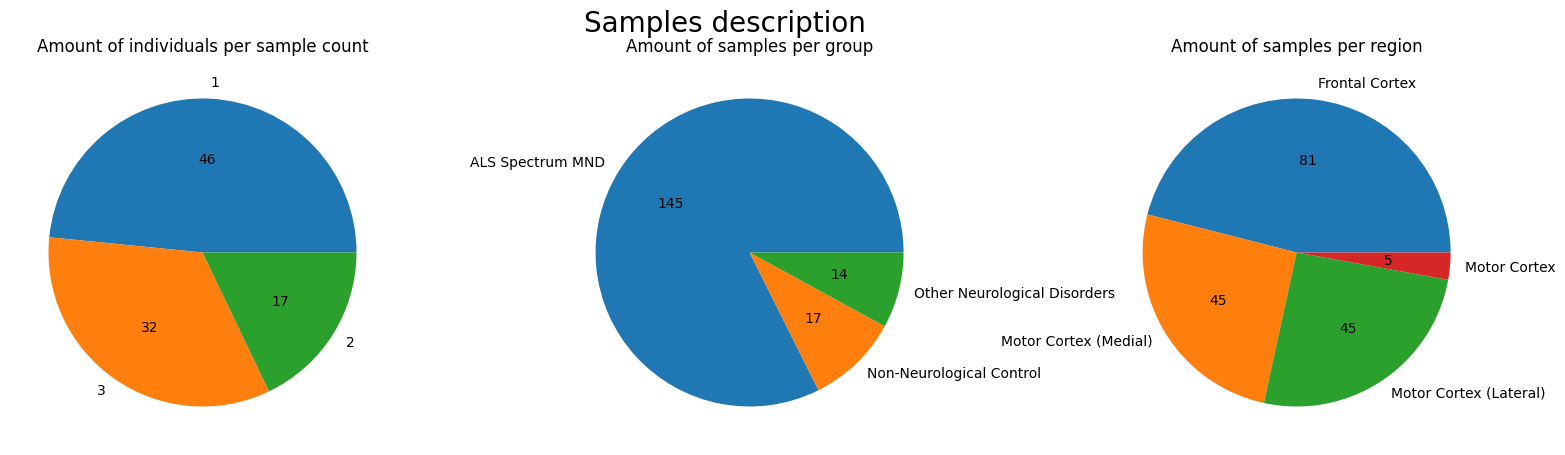

In [4]:
sequences.plot_annotations()

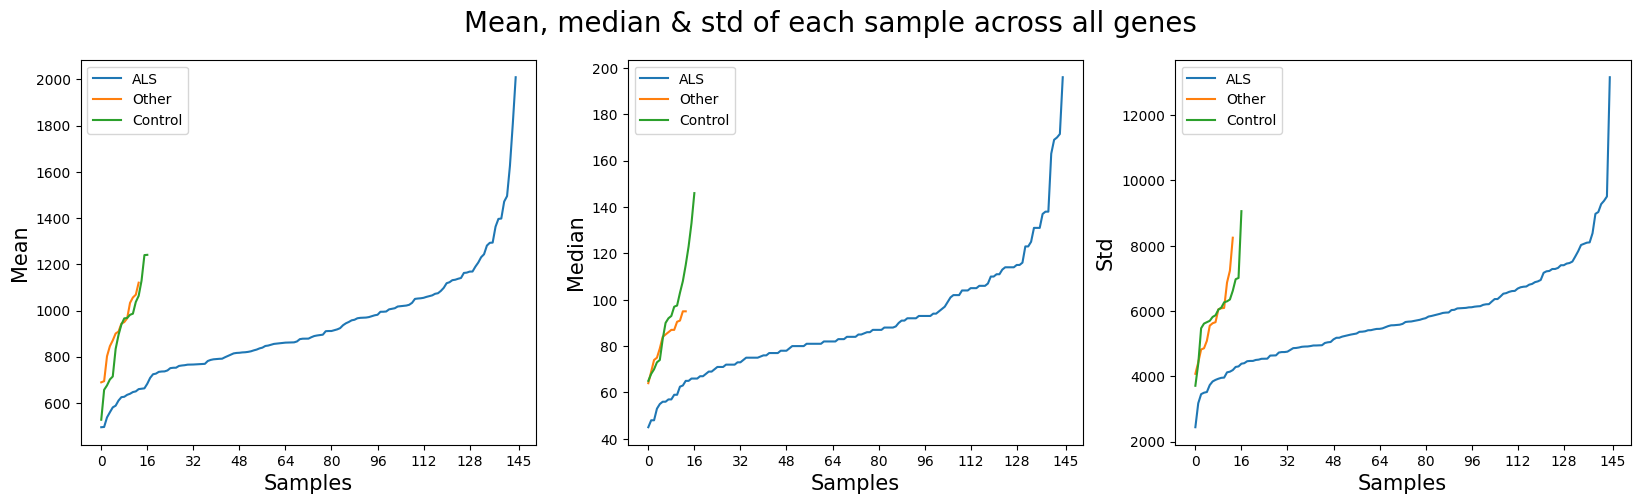

In [5]:
sequences.plot_metrics(by_sample=True)

### RNA counts description

In [6]:
rna_counts = sequences.get_rna_counts()
rna_counts.sample(n=10)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533332,41,60,0,1233,116,153,4,0,8,0,...,758,1844,1730,891,79,435,105,403,1251,1453
GSM3533306,27,69,0,1446,48,54,1,1,15,0,...,416,940,949,543,37,219,57,167,692,833
GSM3533307,18,69,0,946,55,74,0,4,4,2,...,568,1401,1148,703,56,410,81,334,1213,1210
GSM3533346,50,153,0,697,31,9,2,6,91,1,...,501,1310,1147,728,57,335,75,340,1277,1323
GSM3533367,41,145,0,4651,183,205,0,4,55,0,...,1320,3122,2731,1426,125,803,184,685,2671,2619
GSM3533299,91,101,0,2914,182,305,8,3,32,1,...,937,2020,2066,1079,152,552,92,324,1757,1893
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533286,14,196,0,3202,138,114,3,2,32,1,...,602,1340,1325,650,63,380,96,365,1171,1369
GSM3533325,36,47,0,2620,108,130,7,4,70,0,...,585,1327,1320,716,82,437,94,268,1100,1047
GSM3533281,16,65,0,2425,51,123,2,0,113,0,...,570,1389,1210,689,71,364,81,296,1201,1422


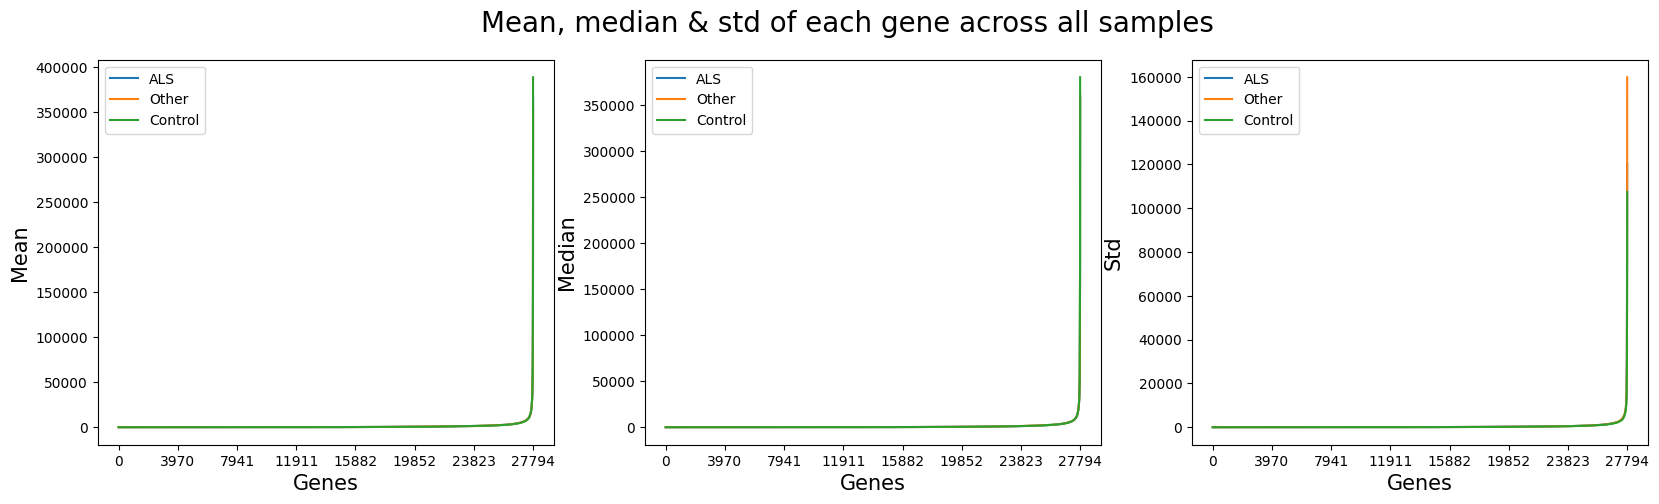

In [7]:
sequences.plot_metrics()

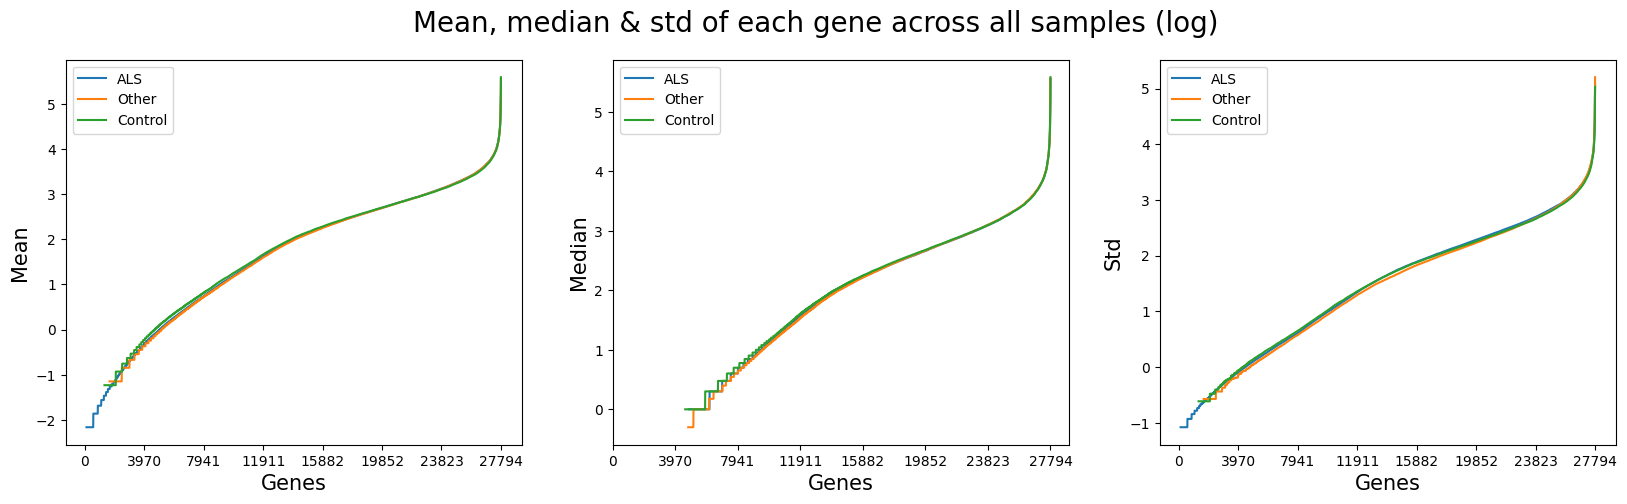

In [8]:
sequences.plot_metrics(log=True)

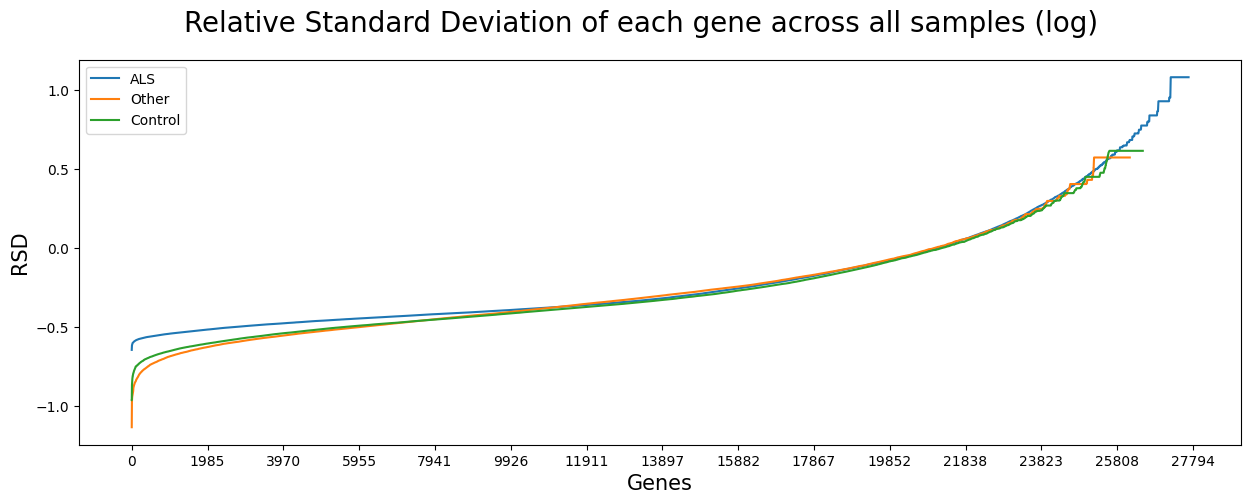

In [9]:
sequences.plot_rsd()

## Step 3 - PCA

In [10]:
my_pca = MyPCA(sequences, rna_counts)

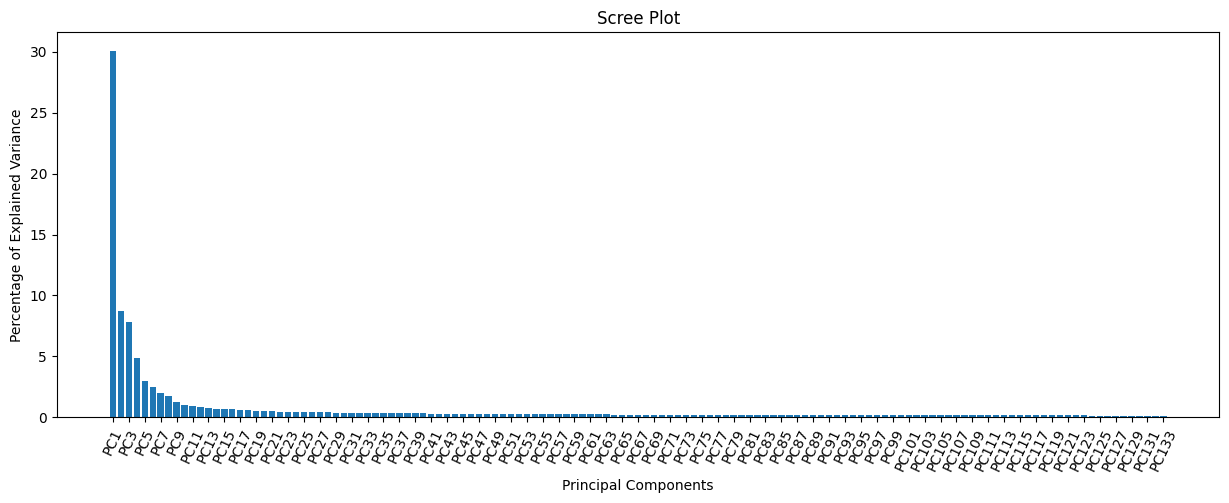

In [11]:
my_pca.scree_plot()

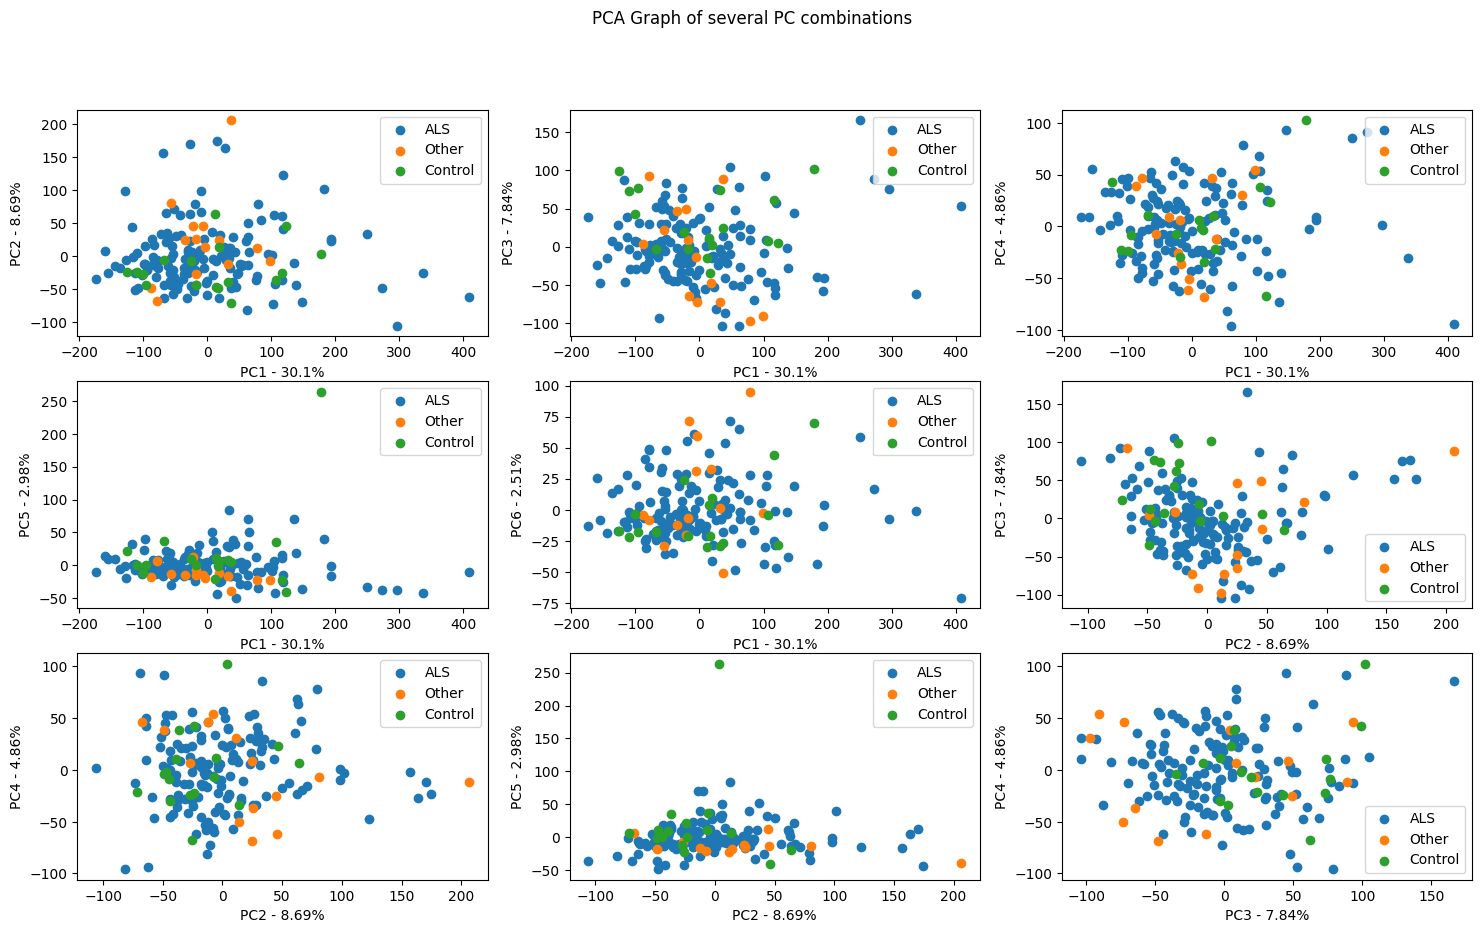

In [12]:
my_pca.visualize()

## Step 5 - Univariate analysis

In [13]:
t_test = Ttest(sequences)

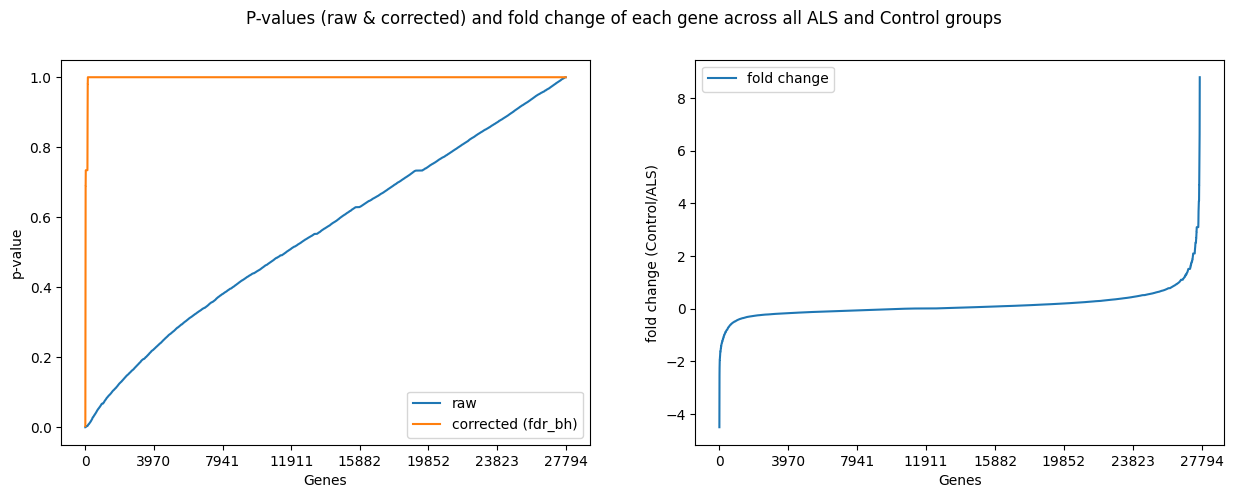

In [14]:
t_test.plot_metrics()

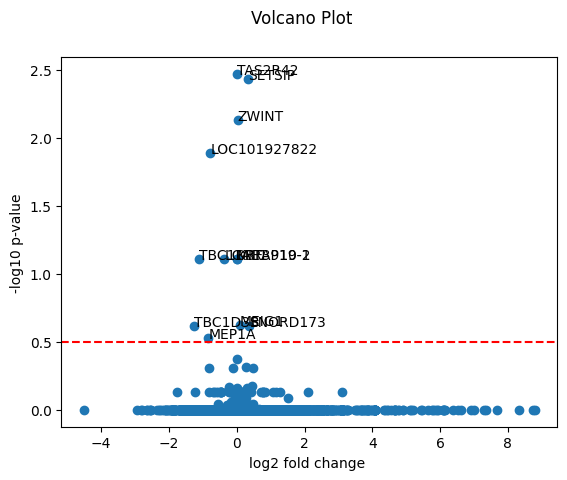

In [15]:
t_test.volcano_plot()

## STEP 6 - Multivariate Analysis - Elastic-Net

In [ ]:
elastic_net = ElasticNet(sequences)

In [17]:
elastic_net.save_top_100_genes()